# Principal Component Analysis (PCA)

In this notebook, I will be working with an in-built dataset from scikit-learn named breast cancer dataset. The breast cancer dataset is a classic and very easy binary classification dataset which contains information of breast cancer tumors. It only has 569 instances so the data is reasonably small. But, it has 30 numeric attributes. This is quite large in comparison to the number of instances.

I will use PCA (unsupervised method) to determine what are the most important components that explain the most variance in the dataset.

## Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

I will not be working with any machine learning algorithms for prediction classification as I want to focus on Principal Component Analysis in this notebook. If I wanted to use this dataset with another classification algorithm, I would probably do PCA first to get an understanding of what is important in determining if a tumor will be malignant or benign.

Now, I will create a dataframe with the feature names and data.

In [10]:
df = pd.DataFrame(data=cancer["data"],columns=cancer["feature_names"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
len(df)

569

In [12]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The dataframe seems to have no null values and it is clean (including formatting).

As such, I will now scale the data so that each feature has a single unit variance before doing PCA.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_features = scaler.fit_transform(df)
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
scaled_df = pd.DataFrame(data=scaled_features,columns=cancer["feature_names"])
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


It is very difficult to visualize high dimensional data. In this case, there are 30 dimensions. I will use PCA to find the first 3 principal components and visualize the data in this new 3D space.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=3)

In [21]:
x_pca = pca.fit_transform(scaled_features)
x_pca

array([[ 9.19283684,  1.94858339, -1.12316854],
       [ 2.3878018 , -3.76817154, -0.52929431],
       [ 5.73389628, -1.07517378, -0.55174793],
       ...,
       [ 1.25617927, -1.90229685,  0.5627316 ],
       [10.37479406,  1.67201003, -1.87702877],
       [-5.47524328, -0.67063624,  1.49043847]])

In [22]:
x_pca.shape
# number of features reduced from 30 to 3 (principal components)

(569, 3)

In [23]:
pca.components_
# correlation between the 30 features and the 3 principal components.

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016537, -0.0347675 ,  0.19034877,  0.36657548,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443046,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853123,  0.06454989, -0.00931421,  0.02869952, -0.10429183,
        -0.07409157,  0.00273379, -0.0255636 , -0

In [24]:
df1 = pd.DataFrame(data=pca.components_,columns=cancer["feature_names"])
df1
# Rows are the 3 principal components
# Columns are the 30 features
# This shows relevance and correlation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034767,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


<AxesSubplot:>

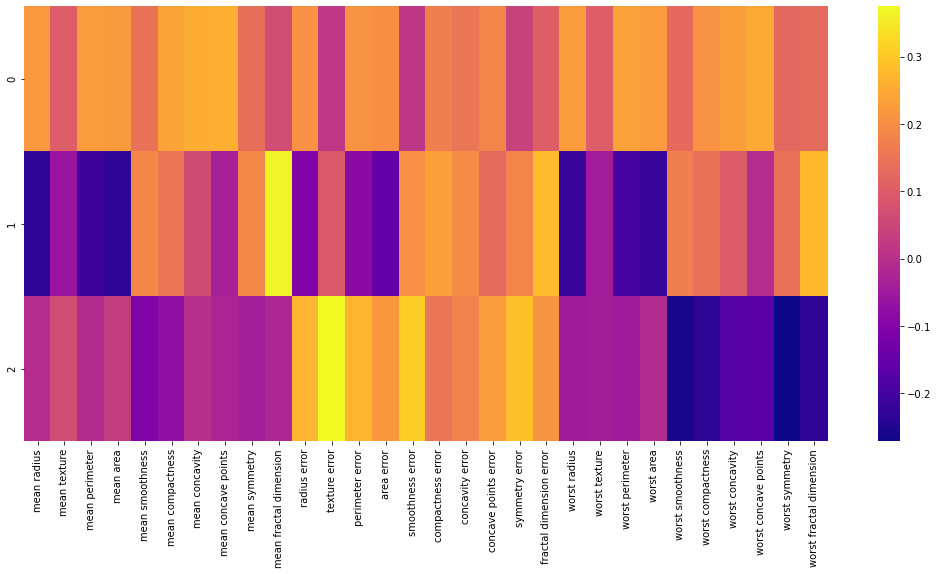

In [25]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df1,cmap="plasma")

This heatmap shows the correlation between the various features and each of the 3 Principal Components themselves. However, with this great power of dimensional reduction, it comes with a cost of not being able to easily understand what each of these 3 Components represent. Principal Components do not relate (1 to 1) to specific features in the data. These are combination of the original features. The features themselves are stored as attributes of the PCA object.

In [26]:
df_xpca = pd.DataFrame(data=x_pca,columns=[1,2,3])
df_xpca
# creating a dataframe with the 3 Principal Components (columns) from the initial 30 columns (features)

,1,2,3
0,9.192837,1.948583,-1.123169
1,2.387802,-3.768172,-0.529294
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232791
4,3.935302,-1.948071,1.389765
...,...,...,...
564,6.439315,-3.576817,2.459485
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562732
567,10.374794,1.672010,-1.877029


Interpreting these components is not that easy. In this case, the dataset comes with a target column which I will use to help me visualize the Principal Components. 

In [27]:
pd.DataFrame(cancer["target"])

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [28]:
findf = pd.concat([df_xpca,pd.DataFrame(cancer["target"])],axis=1)
findf.rename(columns={0:"target",1:"1st Principal Component",2:"2nd Principal Component",
                      3:"3rd Principal Component"},inplace=True)
findf

,1st Principal Component,2nd Principal Component,3rd Principal Component,target
0,9.192837,1.948583,-1.123169,0
1,2.387802,-3.768172,-0.529294,0
2,5.733896,-1.075174,-0.551748,0
3,7.122953,10.275589,-3.232791,0
4,3.935302,-1.948071,1.389765,0
...,...,...,...,...
564,6.439315,-3.576817,2.459485,0
565,3.793382,-3.584048,2.088476,0
566,1.256179,-1.902297,0.562732,0
567,10.374794,1.672010,-1.877029,0


I will start by using matplotlib to plot the 1st and 2nd Principal Components. It can be seen, that there is a very clear separation of malignant versus benign tumors. This is only using 2 dimensions of data when initially there were 30. This can be thought of as a "compression" algorithm since data is transformed to reduce the dimensionality. 

Text(0.5, 1.0, 'Principal Components vs Target')

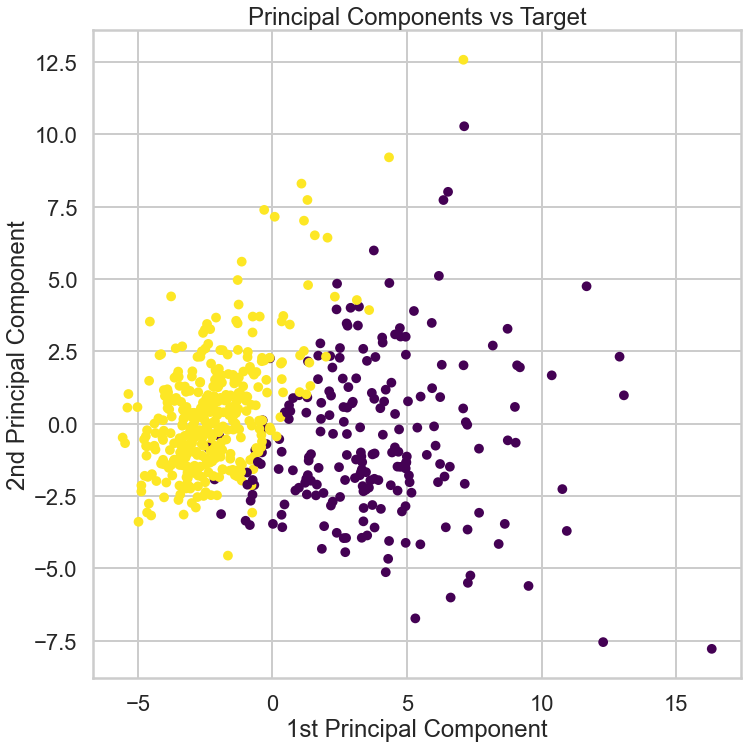

In [29]:
sns.set_style(style="whitegrid")
sns.set_context(context="poster")

fig = plt.figure(figsize=(9,9))
axes = fig.add_axes([0,0,1,1])

axes.scatter(findf["1st Principal Component"],findf["2nd Principal Component"],c=findf["target"],s=60,cmap="viridis")
axes.set_xlabel("1st Principal Component")
axes.set_ylabel("2nd Principal Component")
axes.set_title("Principal Components vs Target")

Now, I will use all 3D plot to visualize all 3 Principal Components.

In [30]:
from mpl_toolkits import mplot3d

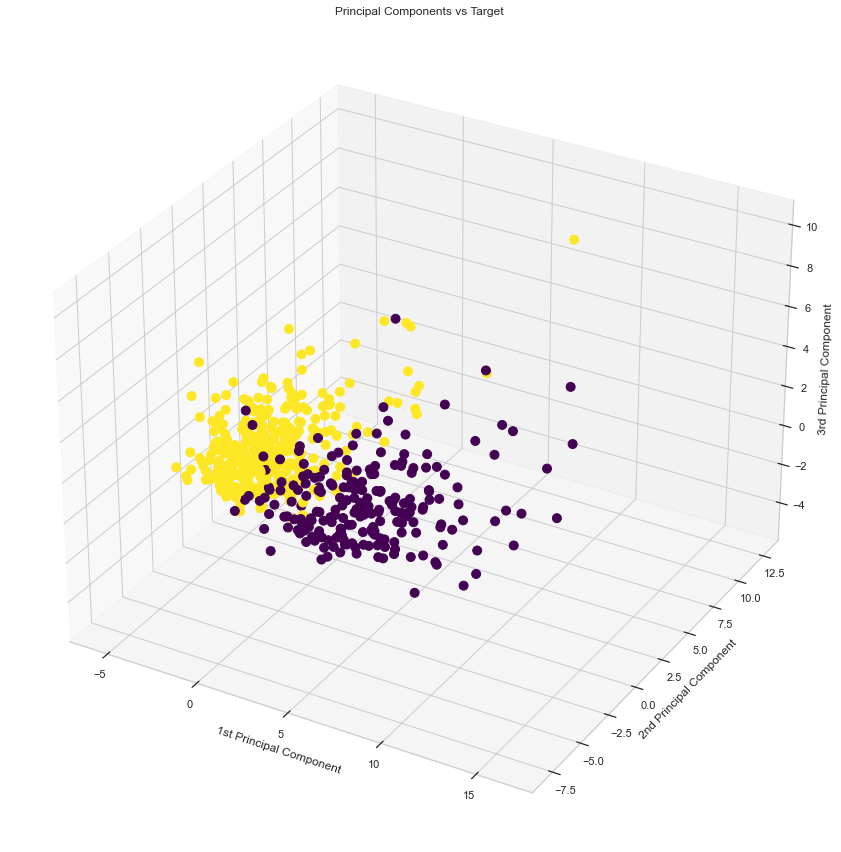

In [31]:
sns.set_context(context="notebook")

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")
ax.scatter3D(xs=findf["1st Principal Component"],ys=findf["2nd Principal Component"],zs=findf["3rd Principal Component"],
             zdir="z", c=findf["target"],s=80,cmap="viridis", depthshade=False)

ax.set_title("Principal Components vs Target")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")

plt.tight_layout()

I will use plotly to create an interactive 3D plot of the 3 Principal Components.

In [32]:
import cufflinks as cf
cf.go_offline()

In [33]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [34]:
init_notebook_mode(connected=True)

In [35]:
import plotly.express as px
fig = px.scatter_3d(findf, x="1st Principal Component", y="2nd Principal Component", z="3rd Principal Component",
                    color="target",title="Principal Components vs Target",width=950,height=700,opacity=1,
                    labels={"target":"Breast Cancer"},range_x=[-5,15],range_y=[-7.5,12.5],range_z=[-4,10])
fig.show()

It can be seen that PCA did really well in this example. With these 3 Principal Components, it would be a good option to feed in the reduced version (x_pca) of the original breast cancer dataset to a classification algorithm, such as: a Logistic Regression algorithm instead of using the entire original dataset. Both classes (malignant and benign) can be easily separated by a straight line and Support Vector Machines would also be a good choice for particular scenario.